In [1]:
import tensorflow as tf
#model_cytoplasm = tf.keras.models.load_model('UNET_cytoplasm.h5')
model_1 = tf.keras.models.load_model('UNET_mono.h5')
model_2 = tf.keras.models.load_model('UNET_mono_b.h5')
#model_3cat = tf.keras.models.load_model('UNET_3Cat.h5')
import matplotlib.pyplot as plt

2024-06-24 15:05:08.406337: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-24 15:05:08.800714: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /var:/usr/local/cuda-12.5/lib64
2024-06-24 15:05:08.800836: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-24 15:05:08.856384: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-24 15:05:1

In [2]:
import numpy as np
import tifffile as tif

# Assuming you have test images in a directory, similar to how you handled training data
folder = '/media/hcleroy/experimental_data/Synphilin_Timelapse/'
test_image_paths = [folder+'Cell'+str(i)+'_ROI'+str(i)+'.tif' for i in range(1,9)]  # Add your test image paths here



In [3]:
# Preprocess test images
test_images = [tif.imread(path) for path in test_image_paths]
test_images = [tf.image.resize(img[25,12, :,:, np.newaxis], (256, 256)) for img in test_images]
#test_images = np.array([ img for imgs in test_images for img in imgs], dtype=np.float32)
test_images = np.array([ img for img in test_images], dtype=np.float32)
test_images /= 255.0  # Normalize pixel values to [0, 1]

In [4]:
# Make predictions
#predictions_cytoplasm = model_cytoplasm.predict(test_images)
#predictions_condensate = model_condensate.predict(np.log(test_images))
predictions_1 = model_1.predict(test_images)
predictions_2 = model_2.predict(test_images)

2024-06-24 15:05:46.020057: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2024-06-24 15:05:46.067058: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2024-06-24 15:05:47.939570: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2024-06-24 15:05:48.097857: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 134217728 exceeds 10% of free system memory.
2024-06-24 15:05:48.520421: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 268435456 exceeds 10% of free system memory.


1/1 [==============================] - 1s 720ms/step


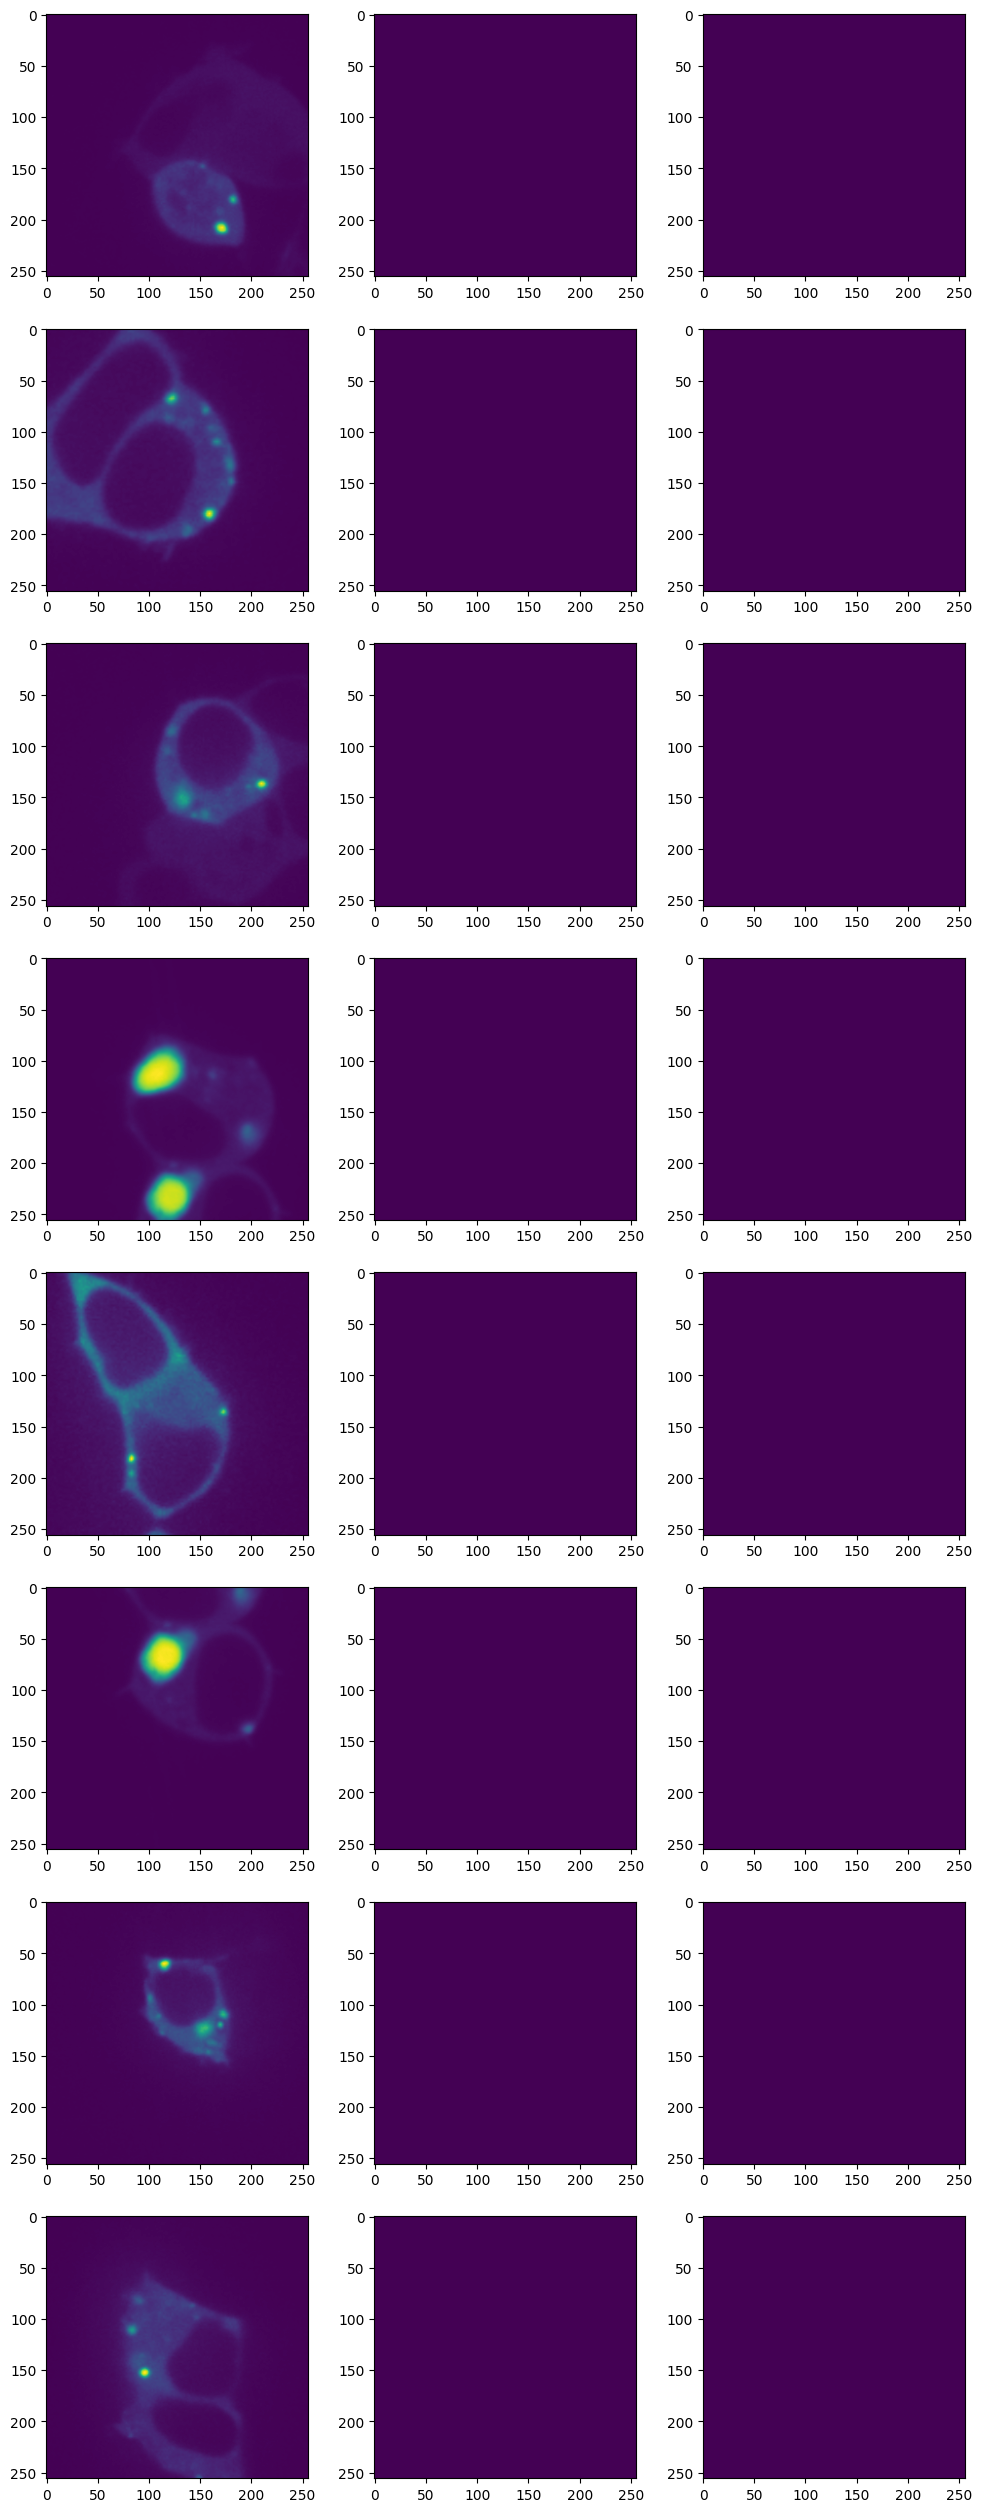

In [8]:
fig,ax = plt.subplots(ncols=3,nrows=8,figsize=(12,8*4))
for i in range(predictions_1.shape[0]):
    ax[i,0].imshow(test_images[i])
    ax[i,1].imshow(predictions_1[i])
    ax[i,2].imshow(predictions_2[i])
    #ax[i,2].imshow(predictions_condensate[i][:,:])
    #ax[i,2].imshow(cyt_mask[i])